<a href="https://colab.research.google.com/github/victormurcia/CTS_Test/blob/main/EDA_NCT04871100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 17)

In [22]:
#Load Patient Dataframe
url = 'https://raw.githubusercontent.com/victormurcia/CTS_Test/main/MDClone/NCT04871100.csv'
cohort = pd.read_csv(url)
cohort

,date of birth,gender at birth,anxiety_disorder-condition,good_memory-health factor,good_attention-health factor,good_decision_making-health factor,alcohol_use-health factor,not_suicidal-health factor,not_suicidal-age at event,not_psychotic -condition
0,1979.250000,Male,True,True,True,False,True,True,40.070246,True
1,1986.166667,Male,True,True,True,False,True,True,33.046628,True
2,1988.666667,Male,True,True,True,False,True,True,32.793291,True
3,1996.250000,Male,True,True,True,False,True,True,23.119558,True
4,1966.500000,Male,True,True,True,True,True,True,54.433484,True
...,...,...,...,...,...,...,...,...,...,...
824,1960.416667,Male,True,True,True,False,True,True,58.751981,True
825,1963.916667,Male,True,False,True,False,True,True,52.395226,True
826,1964.666667,Male,True,True,True,False,True,True,55.571208,True
827,1982.666667,Male,True,False,True,False,True,True,27.103352,True


In [23]:
cohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date of birth                       829 non-null    float64
 1   gender at birth                     829 non-null    object 
 2   anxiety_disorder-condition          829 non-null    bool   
 3   good_memory-health factor           829 non-null    bool   
 4   good_attention-health factor        829 non-null    bool   
 5   good_decision_making-health factor  829 non-null    bool   
 6   alcohol_use-health factor           829 non-null    bool   
 7   not_suicidal-health factor          829 non-null    bool   
 8   not_suicidal-age at event           829 non-null    float64
 9   not_psychotic -condition            829 non-null    bool   
dtypes: bool(7), float64(2), object(1)
memory usage: 25.2+ KB


In [24]:
def calculate_null_percentage(df):
    total_rows = df.shape[0]
    null_percentages = df.isnull().sum() / total_rows * 100
    return null_percentages

print('Attribute                                       %Null')
print('-----------------------------------------------------')
calculate_null_percentage(cohort)

Attribute                                       %Null
-----------------------------------------------------


date of birth                         0.0
gender at birth                       0.0
anxiety_disorder-condition            0.0
good_memory-health factor             0.0
good_attention-health factor          0.0
good_decision_making-health factor    0.0
alcohol_use-health factor             0.0
not_suicidal-health factor            0.0
not_suicidal-age at event             0.0
not_psychotic -condition              0.0
dtype: float64

In [25]:
#Convert year to an integer
cohort['date of birth'] = cohort['date of birth'].round().astype(int)
# Get the current year
current_year = datetime.datetime.now().year
cohort['age'] = current_year - cohort['date of birth']
#Remove patients whose age exceeds 65 or is below 18
cohort = cohort[(cohort['age'] < 65) & (cohort['age'] > 18)].reset_index().drop(['index'], axis=1)
cohort

,date of birth,gender at birth,anxiety_disorder-condition,good_memory-health factor,good_attention-health factor,good_decision_making-health factor,alcohol_use-health factor,not_suicidal-health factor,not_suicidal-age at event,not_psychotic -condition,age
0,1979,Male,True,True,True,False,True,True,40.070246,True,44
1,1986,Male,True,True,True,False,True,True,33.046628,True,37
2,1989,Male,True,True,True,False,True,True,32.793291,True,34
3,1996,Male,True,True,True,False,True,True,23.119558,True,27
4,1966,Male,True,True,True,True,True,True,54.433484,True,57
...,...,...,...,...,...,...,...,...,...,...,...
604,1960,Male,True,True,True,False,True,True,58.751981,True,63
605,1964,Male,True,False,True,False,True,True,52.395226,True,59
606,1965,Male,True,True,True,False,True,True,55.571208,True,58
607,1983,Male,True,False,True,False,True,True,27.103352,True,40


In [27]:
# Calculate the percentage of non-False values in each column
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
nf = cohort[nonnumeric_columns].drop('gender at birth',axis=1)
percentage_non_false = (nf == True) | (nf == 'True')
percentage_non_false = percentage_non_false.sum() / len(nf) * 100
print('Attribute                                       %True')
print('-----------------------------------------------------')
print(percentage_non_false)

Attribute                                       %True
-----------------------------------------------------
anxiety_disorder-condition            100.000000
good_memory-health factor              78.325123
good_attention-health factor          100.000000
good_decision_making-health factor     21.510673
alcohol_use-health factor             100.000000
not_suicidal-health factor            100.000000
not_psychotic -condition              100.000000
dtype: float64


In [28]:
def plot_util(df,cols_to_plot,plot_type,figsize=(12,6)):

  # Determine the number of rows and columns for subplots
  num_columns = len(cols_to_plot)
  if num_columns <= 4:
      nrows = 1
      ncols = num_columns
  else:
      nrows = (num_columns + 2) // 3  # Round up to the nearest integer
      ncols = 4

  # Create a grid of plots using Matplotlib's subplots
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
  # Flatten the axes array
  axes = axes.ravel()

  # Create a color palette
  colors = sns.color_palette("Set2", n_colors=num_columns)

  # Iterate over numeric columns and create histograms
  for i, column in enumerate(cols_to_plot):
      ax = axes[i]

      #Select plot type:
      if plot_type == 'hist':
        # Plot histogram for the current column with a different color
        sns.histplot(data=df, x=column, kde=True, color=colors[i], ax=ax)
      elif plot_type == 'count':
        # Create count plot for the current column
        sns.countplot(data=df, x=column, color=colors[i], ax=ax)
      
      ax.set_title(column)
      ax.set_ylabel("Counts")

  # Remove any unused subplots
  if num_columns < nrows * ncols:
    for j in range(num_columns, nrows * ncols):
        fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()
  return -1

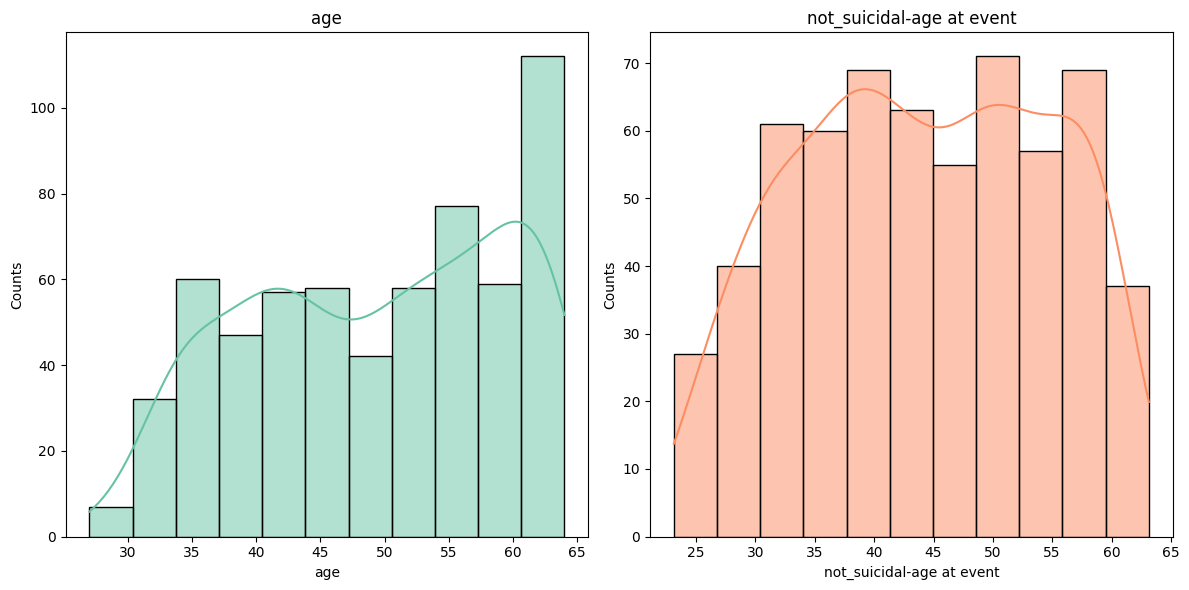

-1

In [32]:
numeric_cols = ['age','not_suicidal-age at event']
plot_util(cohort,numeric_cols,'hist')

In [33]:
# Calculate descriptive statistics
stats = cohort[numeric_cols].describe()
stats

,age,not_suicidal-age at event
count,609.000000,609.000000
mean,49.390805,44.150897
std,10.083124,10.394085
min,27.000000,23.119558
25%,41.000000,36.070420
50%,51.000000,44.059229
75%,59.000000,53.046194
max,64.000000,63.147091


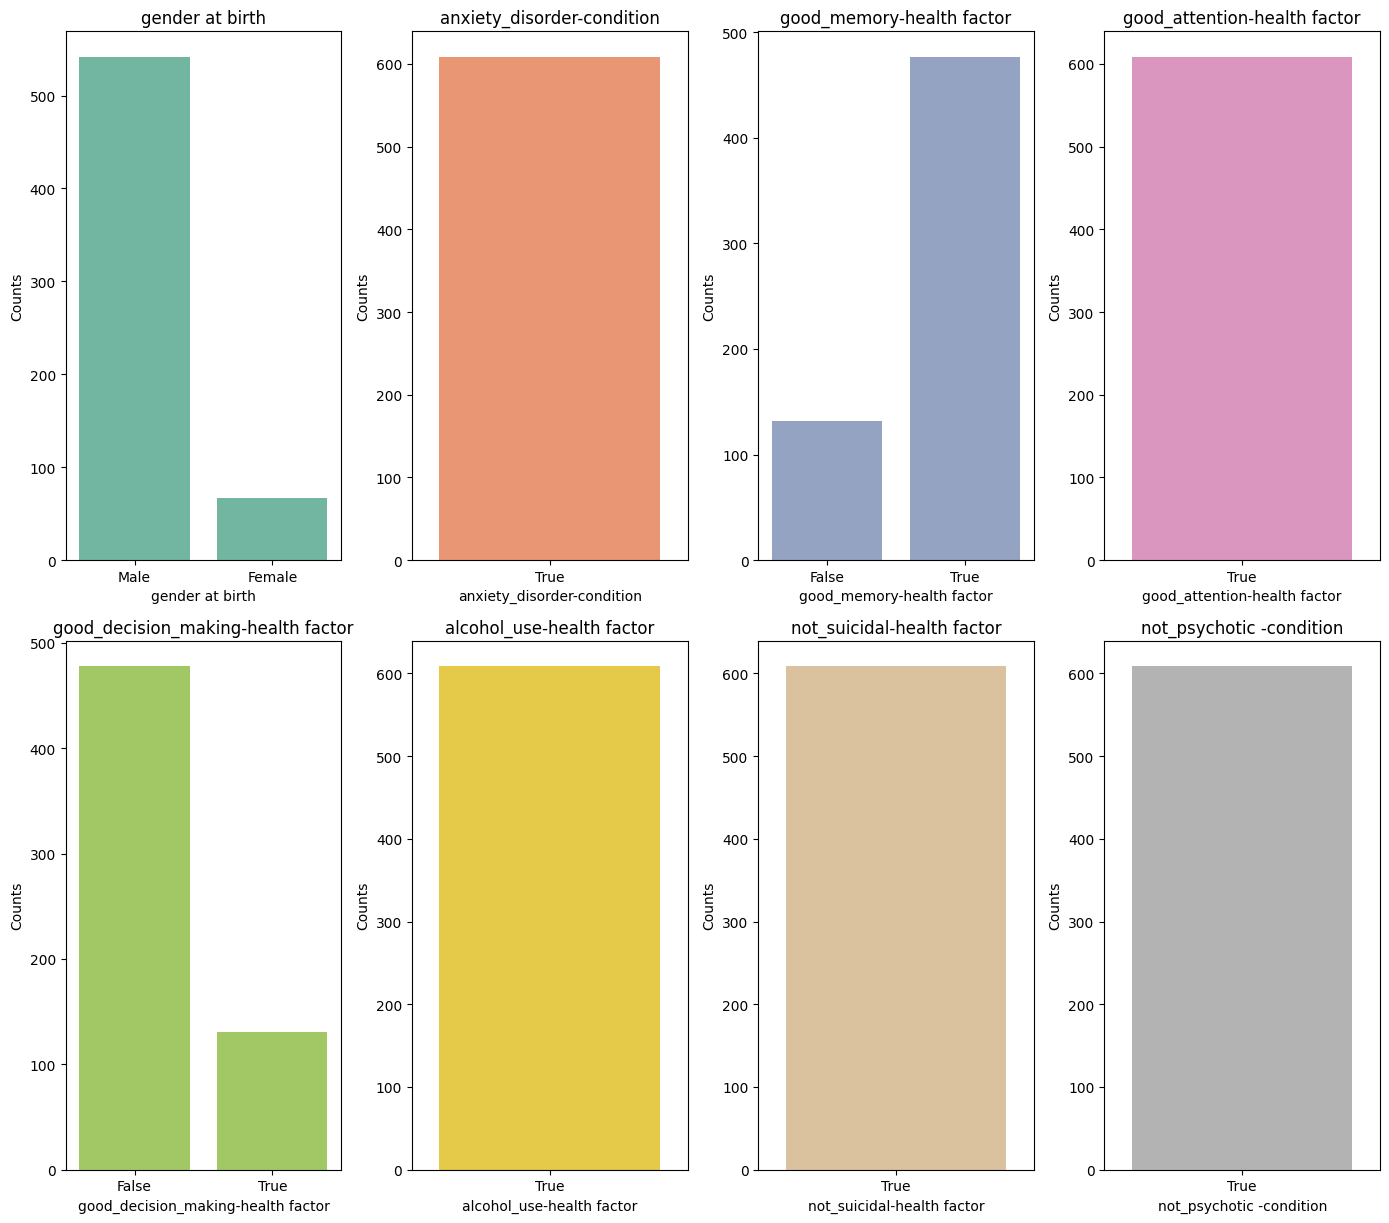

-1

In [34]:
#nonnumeric_cols = [x for x in cohort.columns if x not in numeric_cols]
nonnumeric_columns = cohort.select_dtypes(exclude=['number']).columns
plot_util(cohort,nonnumeric_columns,'count',figsize=(14,18))

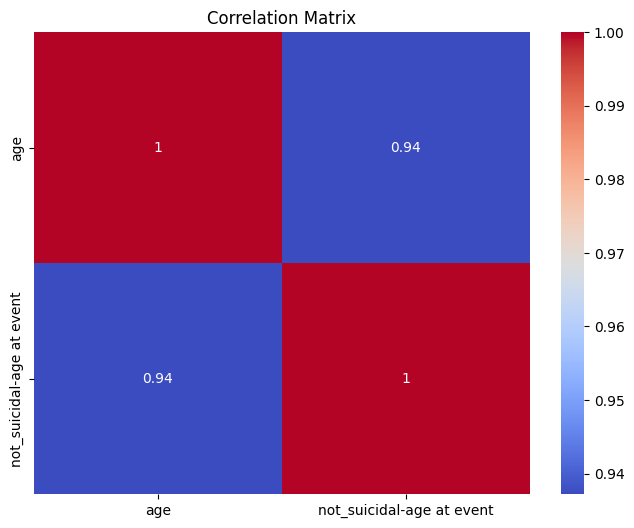

In [35]:
# Calculate the correlation matrix
corr_matrix = cohort[numeric_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()